In [2]:
import pandas as pd
import numpy as np

In [3]:
coso = pd.read_csv('data/coso.csv')
new0 = pd.read_csv('data/New_DB_new0.csv')
new0 = new0[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()
coso = coso[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()

data_0 = pd.read_csv('data/xterrae_data_0').dropna()
data_1 = pd.read_csv('data/xterrae_data_1').dropna()

data_0 = pd.merge(new0, data_0, on=['Latitud', 'Longitud'], how='inner')
data_1 = pd.merge(coso, data_1, on=['Latitud', 'Longitud'], how='inner')

data_0 = data_0.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_1 = data_1.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_0['Valor'] = 0
data_1['Valor'] = 1

final_db = pd.read_csv('data/final_db.csv')
final_db = final_db.drop(columns='Unnamed: 0')

In [5]:
inicial_db = pd.read_csv('data/db_inicial.csv')
inicial_db.shape, final_db.shape

((1070, 151), (733, 137))

In [6]:
#importe de funciones locales
from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral

#Analizar si todas las columnas estan para luego concatenar
comparar_columnas(final_db, data_0)
comparar_columnas(final_db, data_1)

Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.
Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.


In [7]:
# Concatenación y eliminación de valores NaN
final = pd.concat([final_db, data_0])
final = pd.concat([final, data_1])
final = final.dropna()

# Separación de los valores
final_x = final.drop(columns='Valor')
final_y = final.Valor


In [8]:
final

PIRange_Bulkd.0-5cm.tif  PIRange_Bulkd.100-200cm.tif  \
0                       0.609                        0.689   
1                       0.609                        0.689   
2                       0.595                        0.753   
3                       0.589                        0.682   
4                       0.659                        0.689   
...                       ...                          ...   
1317                    0.604                        0.687   
1318                    0.587                        0.701   
1319                    0.587                        0.701   
1320                    0.587                        0.701   
1321                    0.587                        0.701   

      PIRange_Bulkd.15-30cm.tif  PIRange_Bulkd.30-60cm.tif  \
0                         0.483                      0.641   
1                         0.483                      0.641   
2                         0.484                      0.621   
3                         0.482                      0.614   
4                         0.573                      0.675   
...                         ...                        ...   
1317                      0.502                      0.631   
1318                      0.478                      0.612   
1319                      0.478                      0.612   
1320                      0.478                      0.612   
1321                      0.478                      0.612   

      PIRange_Bulkd.5-15cm.tif  PIRange_Bulkd.60-100cm.tif  \
0                        0.550                       0.650   
1                        0.550                       0.650   
2                        0.497                       0.706   
3                        0.498                       0.656   
4                        0.553                       0.660   
...                        ...                         ...   
1317                     0.512                       0.663   
1318                     0.556                       0.676   
1319                     0.556                       0.676   
1320                     0.556                       0.676   
1321                     0.556                       0.676   

      PIRange_Clay.0-5cm.tif  PIRange_Clay.100-200cm.tif  \
0                  22.358000                   32.235001   
1                  22.358000                   32.235001   
2                  23.513000                   32.325001   
3                  25.056000                   45.129002   
4                  21.844999                   30.417000   
...                      ...                         ...   
1317               25.153999                   44.474998   
1318               25.213001                   43.882000   
1319               25.213001                   43.882000   
1320               25.213001                   43.882000   
1321               25.213001                   43.882000   

      PIRange_Clay.15-30cm.tif  PIRange_Clay.30-60cm.tif  ...  \
0                    22.490000                 26.009001  ...   
1                    22.490000                 26.009001  ...   
2                    25.268002                 31.559998  ...   
3                    25.813000                 32.742996  ...   
4                    18.743000                 21.934999  ...   
...                        ...                       ...  ...   
1317                 24.527000                 31.266998  ...   
1318                 24.993999                 31.622002  ...   
1319                 24.993999                 31.622002  ...   
1320                 24.993999                 31.622002  ...   
1321                 24.993999                 31.622002  ...   

      Tex_Class.0-5cm.tif  Tex_Class.100-200cm.tif  Tex_Class.15-30cm.tif  \
0                     8.0                      8.0                    8.0   
1                     8.0                      8.0                    8.0   
2                     8.0             

In [44]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [45]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.9)
final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 99)


In [46]:
"""import seaborn as sns
import matplotlib.pyplot as plt
corr = final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 12))

heatmap = sns.heatmap(corr, mask=mask, cmap='pink_r', vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

title = heatmap.set_title("Correlation Heatmap", weight='bold', size=16)
title.set_position([0.45, 1.1])
plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\ncorr = final.corr()\nmask = np.triu(np.ones_like(corr, dtype=bool))\n\nfig, ax = plt.subplots(figsize=(15, 12))\n\nheatmap = sns.heatmap(corr, mask=mask, cmap=\'pink_r\', vmax=.3, center=0,\n            annot=True, fmt=\'.2f\', square=True, linewidths=.5, cbar_kws={"shrink": .5})\n\nplt.xticks(rotation=45, ha=\'right\')\nplt.yticks(rotation=0)\n\ntitle = heatmap.set_title("Correlation Heatmap", weight=\'bold\', size=16)\ntitle.set_position([0.45, 1.1])\nplt.show()'

In [47]:
# Importaciones de funciones para generar los modelos
# Importaciones de selección de características
from feature_selection import cart_feature_selection, seleccion_caracteristicas_genetico
from models_gen_X_y import xgboost_random_search, xgboost_bayesopt_classifier, mlp_binary_classification, svm_with_hyperparameter_tuning

In [48]:
# Selección de características por cart y luego se establecen los dataframe con las características elegidas
cart_features = cart_feature_selection(final, 'Valor', n_features=30)
X = final[cart_features]
y = final['Valor']
print(f'Caracateristicas seleccionadas por cart: {cart_features}')

Caracateristicas seleccionadas por cart: ['slope', 'valor_humedad_suelo1', 'PP', 'ksat_60-100cm.tif', 'PIRange_Clay.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif', 'PIRange_Clay.30-60cm.tif', 'PIRange_Clay.0-5cm.tif', 'PIRange_Clay.100-200cm.tif', 'PIRange_Clay.60-100cm.tif', 'Bulkd.60-100cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'Clay.5-15cm.tif', 'Clay.15-30cm.tif', 'PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'Clay.0-5cm.tif', 'Silt.15-30cm.tif', 'n_30-60cm.tif', 'PIRange_Sand.30-60cm.tif', 'n_5-15cm.tif', 'PIRange_Sand.60-100cm.tif', 'Bulkd.15-30cm.tif', 'PIRange_Sand.0-5cm.tif', 'ksat_100-200cm.tif', 'AvMoist.60-100cm.tif', 'ksat_5-15cm.tif', 'Sand.0-5cm.tif', 'n_60-100cm.tif', 'ksat.15-30cm.tif']


In [49]:
features = ['Bulkd.100-200cm.tif', 'slope', 'valor_humedad_suelo1', 'PP']
X = final[features]
y = final['Valor']

In [50]:
#ga_features = ['PIRange_Clay.30-60cm.tif', 'PIRange_Sand.15-30cm.tif', 'n_60-100cm.tif', 'theta_r_60-100cm.tif', 'Bulkd.15-30cm.tif', 'Silt.0-5cm.tif', 'Tex_Class.100-200cm.tif', 'Tex_Class.15-30cm.tif', 'PP', 'slope'] 0.99
#['PIRange_Bulkd.30-60cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'PIRange_Clay.0-5cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.5-15cm.tif', 'AWC_60-100cm.tif', 'FC.60-100cm.tif', 'ksat_15-30cm.tif', 'ksat_30-60cm.tif', 'ksat_5-15cm.tif', 'PWP.15-30cm.tif', 'PWP.30-60cm.tif', 'theta_r_0-5cm.tif', 'alpha.0-5cm.tif', 'alpha.5-15cm.tif', 'ksat.30-60cm.tif', 'ksat.60-100cm.tif', 'n.60-100cm.tif', 'theta_r.30-60cm.tif', 'theta_s.15-30cm.tif', 'Bulkd.15-30cm.tif', 'Bulkd.5-15cm.tif', 'Clay.30-60cm.tif', 'Clay.5-15cm.tif'] 0.99
#X = final[ga_features]
#y = final['Valor']

Número de muestras de entrenamiento: 2518, Número de muestras de prueba: 630
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 88.25%


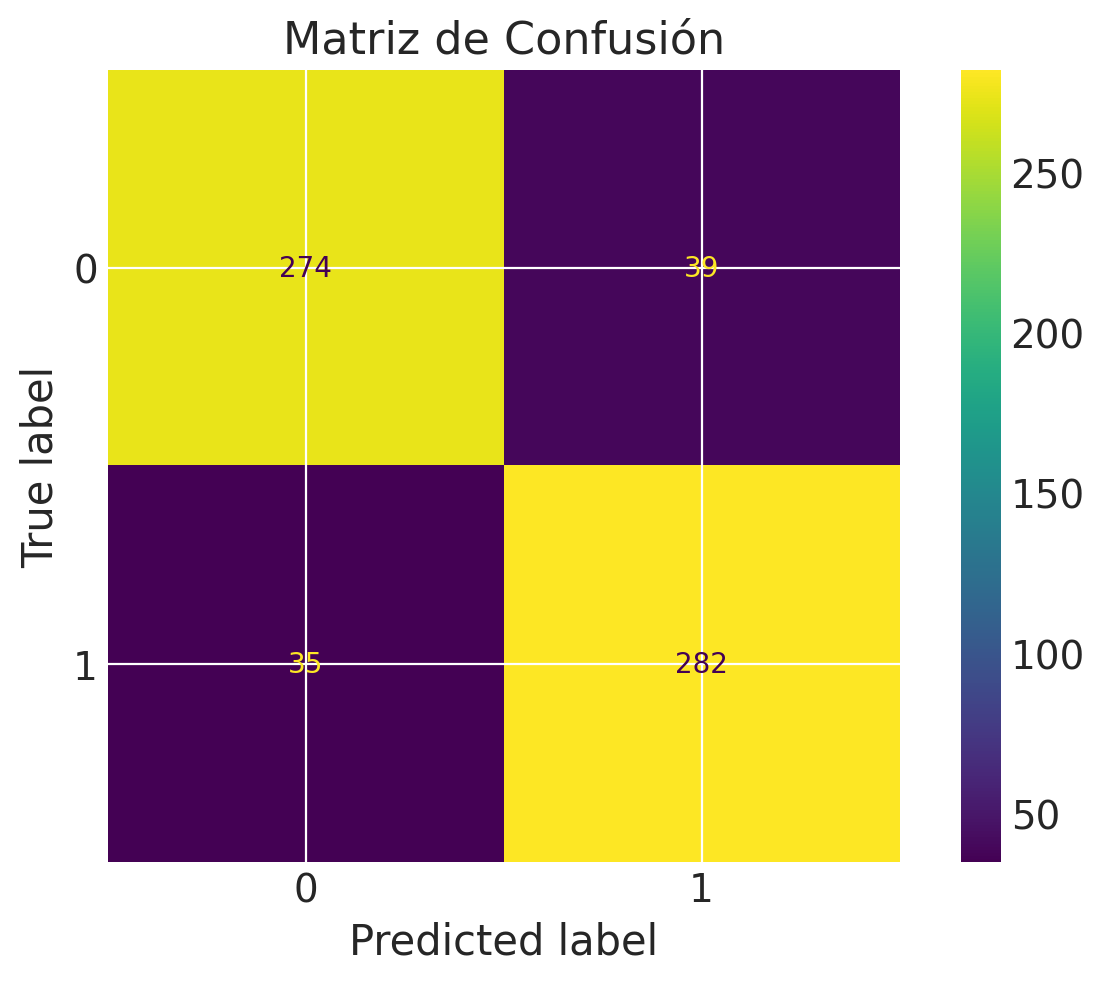

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0.2, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=300,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8825396825396825,
 'best_params': {'subsample': 0.8,
  'reg_lambda': 0,
  'reg_alpha': 0,
  'n_estimators': 300,
  'max_depth': 10,
  'learning_rate': 0.2,
  'gamma': 0.2,
  'colsample_bytree': 0.6}}

In [51]:
# Estancia para modelo de xgboost_random_search

# Se define los parámetros a buscar para el ajuste del modelo
param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0, 1.0, 10.0]
        }
xgboost_random_search(X, y, param_grid=param_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.917651247794619, 'xgb__gamma': 0.16039003248586792, 'xgb__learning_rate': 0.1946533252958557, 'xgb__max_depth': 7, 'xgb__min_child_weight': 8.654408645730339, 'xgb__n_estimators': 863, 'xgb__subsample': 0.8387821809211412}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       306
           1       0.86      0.86      0.86       324

    accuracy                           0.86       630
   macro avg       0.86      0.86      0.86       630
weighted avg       0.86      0.86      0.86       630


Matriz de confusión:
[[261  45]
 [ 45 279]]


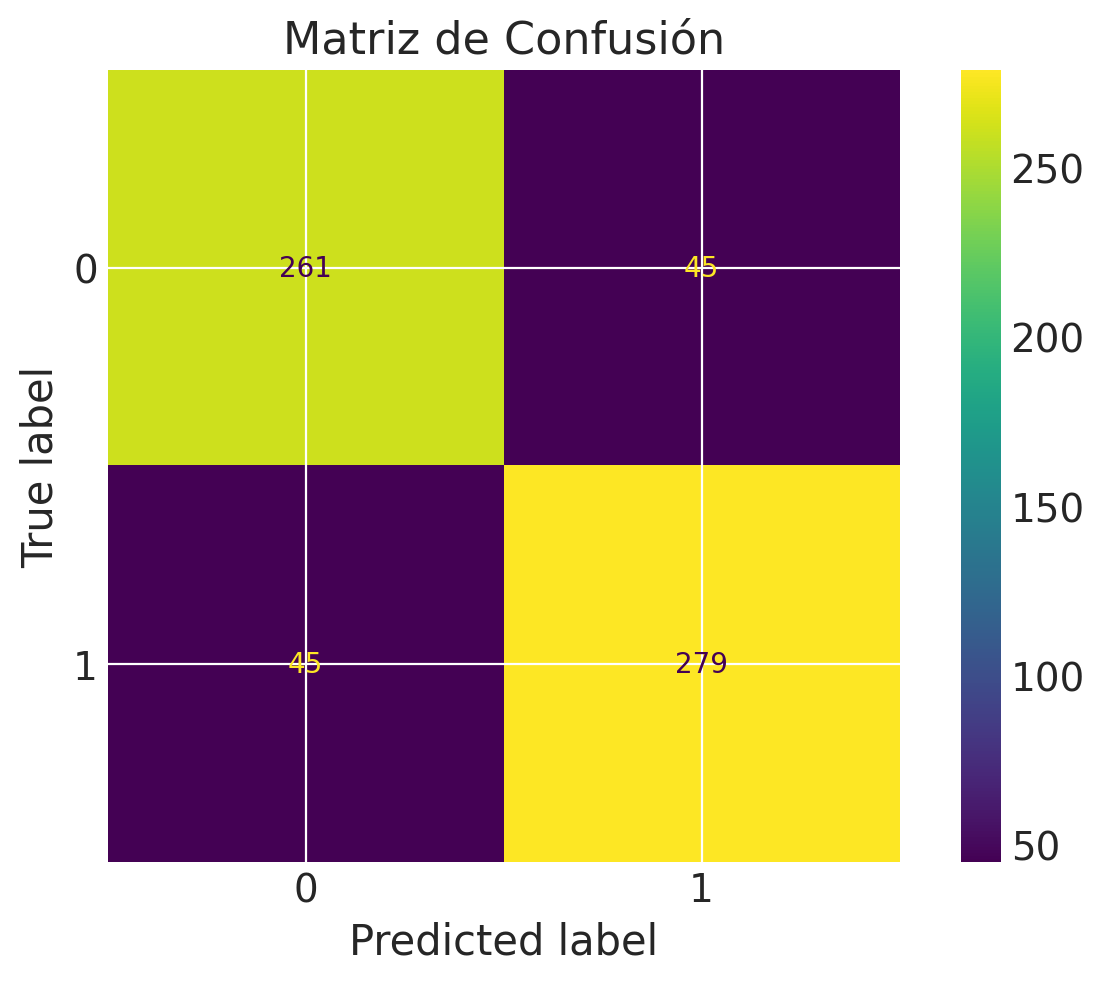

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B6E8828DF0>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B6E90C6A00>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B6E8A26AC0>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B6B6E5B400>},
                   random_state=42, verbose=1)

In [52]:
xgboost_bayesopt_classifier(X,y)

In [53]:
# Se obtuvieron los valores de lo modelos con los datos raw
# ahora se realiza la depuración mediante PUBagging para reentrenar los model
# y comparar los resultados de los modelos sin/con PUBagging

from pubagging import PUBagging

data = final[features]
data['Valor'] = final.Valor
data_aux_1 = data[data.Valor == 1]
data_aux_0 = data[data.Valor == 0]
data_aux_0 = data_aux_0.drop(columns='Valor')
data_aux_1 = data_aux_1.drop(columns='Valor')

landslide_samples = data_aux_1# Example landslide samples as DataFrame
unlabeled_samples = data_aux_0# Example unlabeled samples as DataFrame

pu_bagging = PUBagging(num_iterations=5, sample_ratio=0.4, random_state=42)

pu_bagging.fit(landslide_samples, unlabeled_samples)

probabilities = pu_bagging.predict_proba(unlabeled_samples)
print("Predicted probabilities:", probabilities)

threshold = 0.5 

# Filtrar muestras no deslizamiento por debajo del umbral
non_landslide_indices = np.where(probabilities < threshold)[0]
selected_non_landslide_samples = unlabeled_samples.iloc[non_landslide_indices]

# Ejemplo de cómo podrías utilizar las muestras seleccionadas
print("Muestras no deslizamiento seleccionadas:")
print(selected_non_landslide_samples)

# Se crean los nuevos dataframe para el reentreno donde tenemos data y data_y como input y output respectivamente
selected_non_landslide_samples['Valor'] = 0
data_aux_1['Valor'] = 1

data = pd.concat([data_aux_1, selected_non_landslide_samples])
data_y = data['Valor']
data = data.drop(columns=['Valor'])

Predicted probabilities: [0.2 0.  0.  ... 0.2 0.2 0.6]
Muestras no deslizamiento seleccionadas:
      Bulkd.100-200cm.tif      slope  valor_humedad_suelo1          PP
0                   0.782  32.357300              0.421875   13.532034
1                   0.782  32.357300              0.438995  238.139918
2                   0.899  37.497812              0.520004   32.059045
3                   1.006  36.717389              0.478973    0.000000
5                   0.641  26.953797              0.437943    4.249431
...                   ...        ...                   ...         ...
1162                0.793  24.327043              0.416611    0.674241
1163                0.799  24.327043              0.416611    0.674241
1165                0.923  45.373746              0.352768    1.167900
1166                0.988  35.755171              0.306458    0.000000
1167                0.988  40.502730              0.335510    0.000000

[1373 rows x 4 columns]


C:\Users\ivo\AppData\Local\Temp\ipykernel_11480\812532220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Valor'] = final.Valor
C:\Users\ivo\AppData\Local\Temp\ipykernel_11480\812532220.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_non_landslide_samples['Valor'] = 0


Número de muestras de entrenamiento: 2392, Número de muestras de prueba: 599
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 90.15%


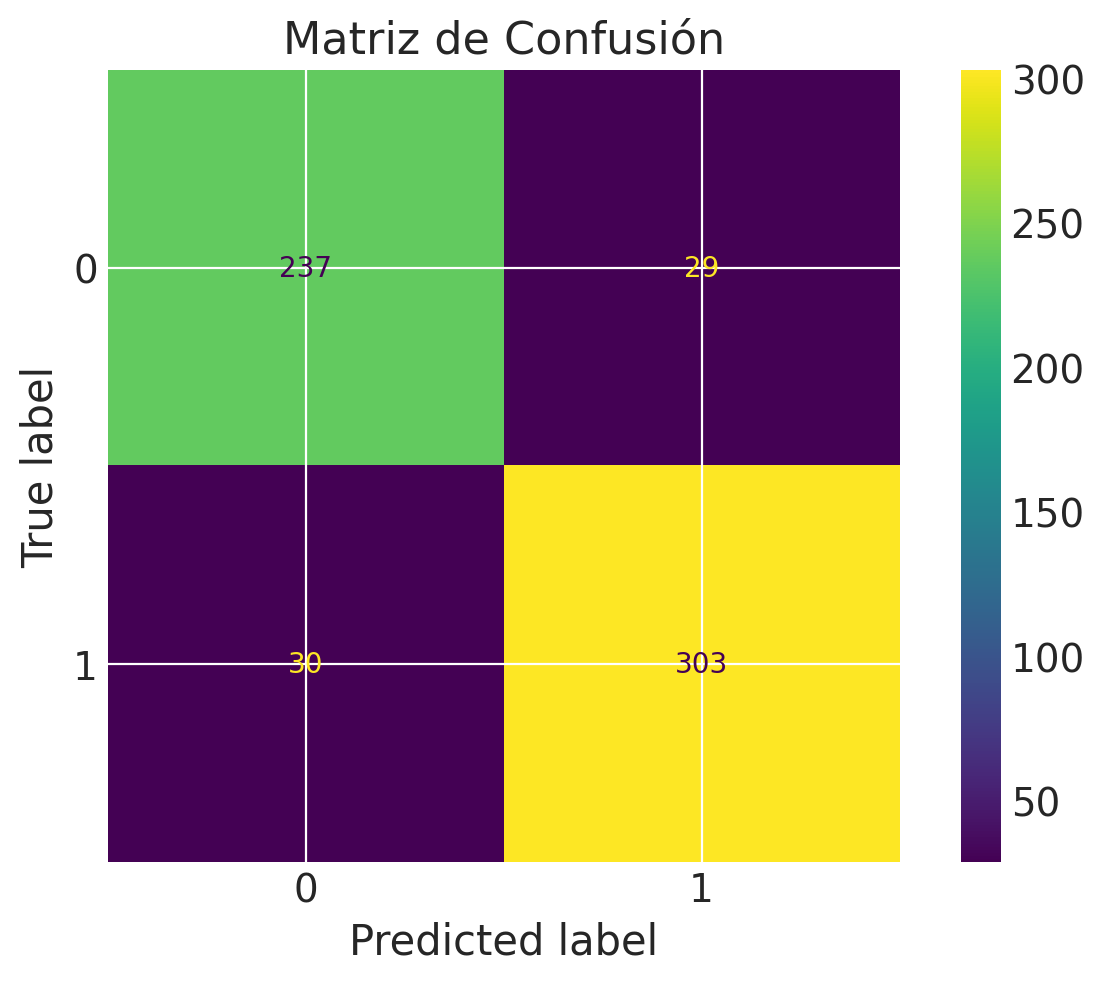

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=300,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.9015025041736227,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 0,
  'reg_alpha': 1.0,
  'n_estimators': 300,
  'max_depth': 10,
  'learning_rate': 0.2,
  'gamma': 0,
  'colsample_bytree': 0.6}}

In [54]:
# Se realiza el reentranmiento de los modelos con los datos ahora depurados
xgboost_random_search(data, data_y, param_grid=param_grid)

Informe de clasificación
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       275
           1       0.75      0.70      0.73       324

    accuracy                           0.72       599
   macro avg       0.72      0.72      0.72       599
weighted avg       0.72      0.72      0.72       599

Matriz de confusión
[[201  74]
 [ 96 228]]


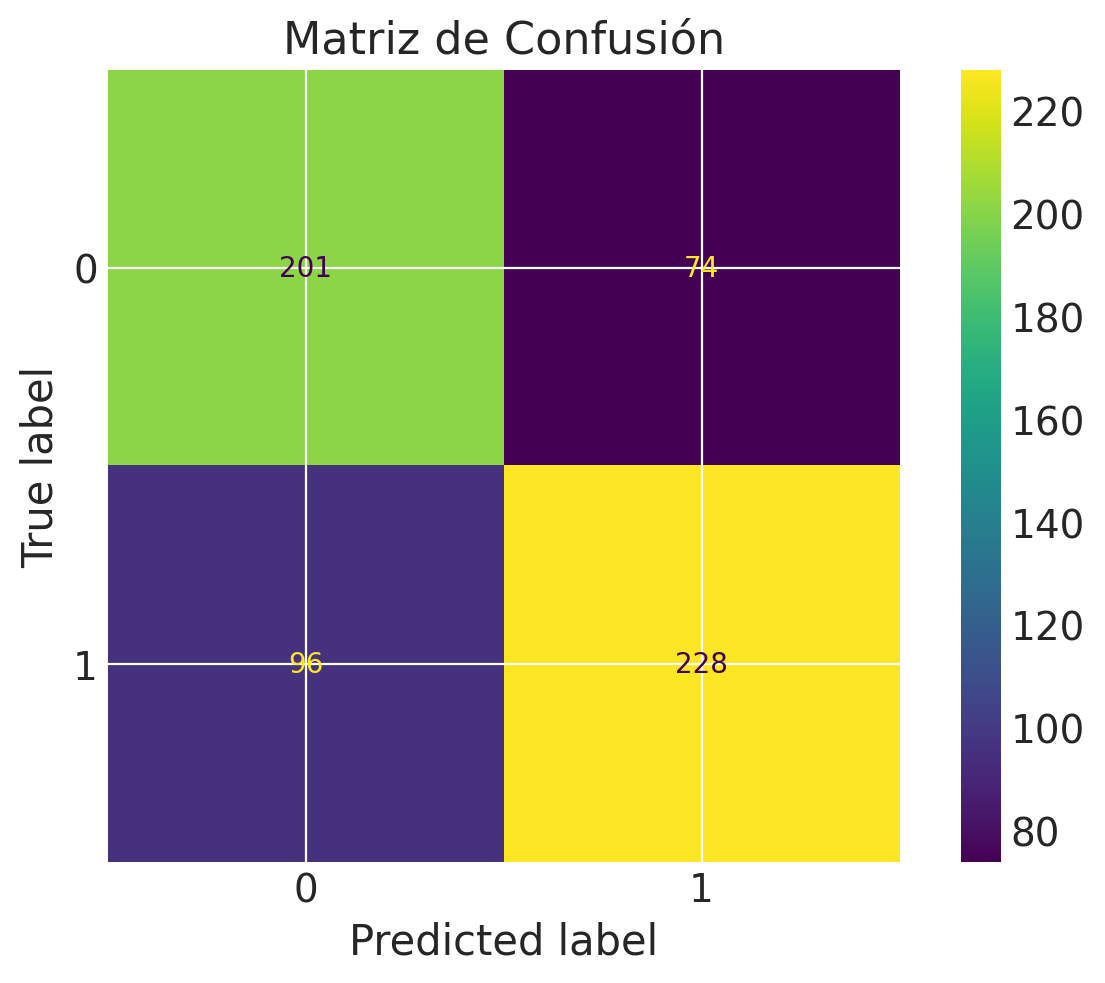

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                               random_state=42))])

In [55]:
mlp_binary_classification(data,data_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.508293914463928, 'xgb__gamma': 0.2560465291496405, 'xgb__learning_rate': 0.23423081744595858, 'xgb__max_depth': 10, 'xgb__min_child_weight': 1.4136772353684972, 'xgb__n_estimators': 588, 'xgb__subsample': 0.845468869051233}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       275
           1       0.89      0.90      0.89       324

    accuracy                           0.88       599
   macro avg       0.88      0.88      0.88       599
weighted avg       0.88      0.88      0.88       599


Matriz de confusión:
[[237  38]
 [ 31 293]]


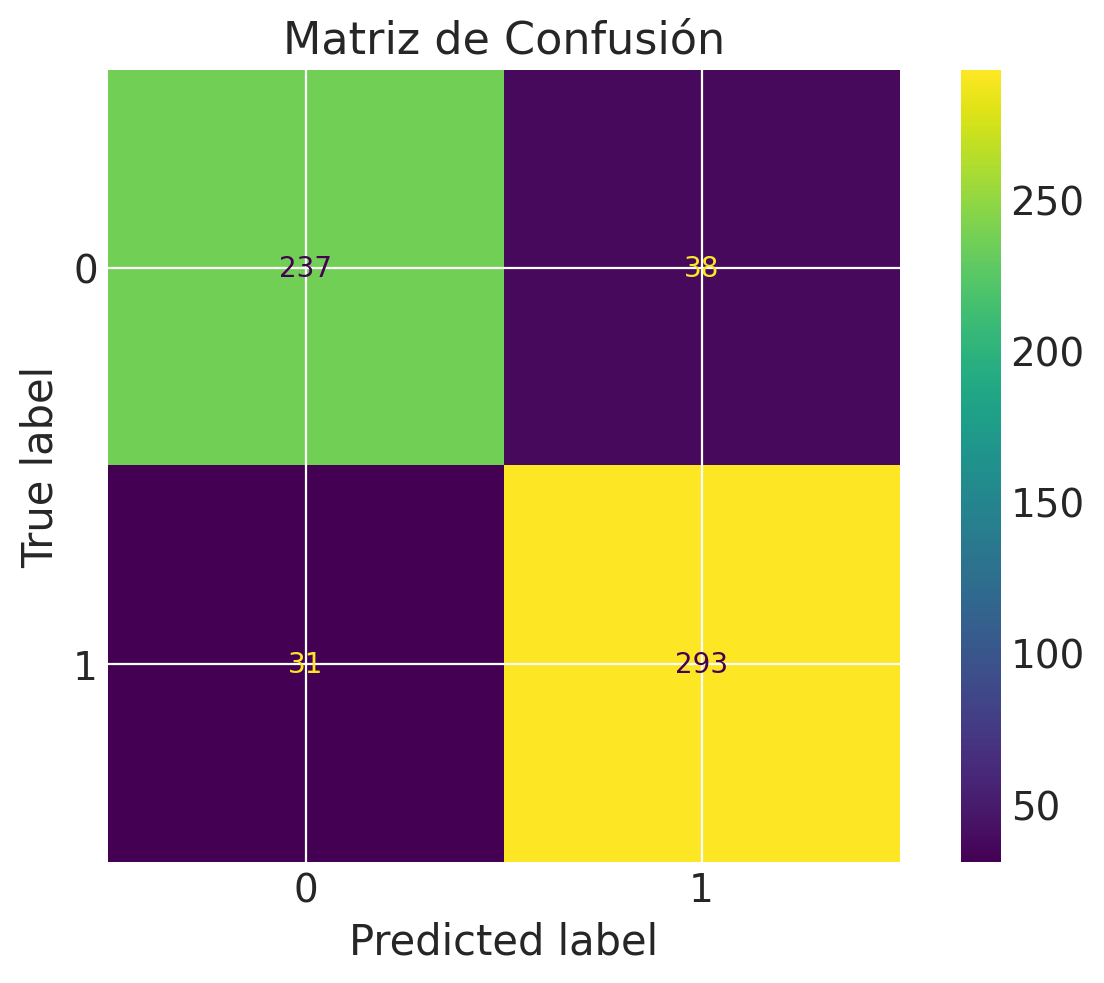

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B6E87F45E0>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B6E86BC9D0>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B6E8903700>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B6E86B9640>},
                   random_state=42, verbose=1)

In [56]:
xgboost_bayesopt_classifier(data,data_y)

In [57]:
svm_with_hyperparameter_tuning(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros encontrados:
{'svm__C': 61.848150962771655, 'svm__gamma': 0.6126531604882809, 'svm__kernel': 'rbf'}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       313
           1       0.71      0.69      0.70       317

    accuracy                           0.70       630
   macro avg       0.70      0.70      0.70       630
weighted avg       0.71      0.70      0.70       630


Matriz de confusión:
[[225  88]
 [ 98 219]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=61.848150962771655, gamma=0.6126531604882809,
                     random_state=42))])

In [58]:
final

PIRange_Bulkd.0-5cm.tif  PIRange_Bulkd.100-200cm.tif  \
0                       0.609                        0.689   
1                       0.609                        0.689   
2                       0.595                        0.753   
3                       0.589                        0.682   
4                       0.659                        0.689   
...                       ...                          ...   
1317                    0.604                        0.687   
1318                    0.587                        0.701   
1319                    0.587                        0.701   
1320                    0.587                        0.701   
1321                    0.587                        0.701   

      PIRange_Bulkd.15-30cm.tif  PIRange_Bulkd.30-60cm.tif  \
0                         0.483                      0.641   
1                         0.483                      0.641   
2                         0.484                      0.621   
3                         0.482                      0.614   
4                         0.573                      0.675   
...                         ...                        ...   
1317                      0.502                      0.631   
1318                      0.478                      0.612   
1319                      0.478                      0.612   
1320                      0.478                      0.612   
1321                      0.478                      0.612   

      PIRange_Bulkd.5-15cm.tif  PIRange_Bulkd.60-100cm.tif  \
0                        0.550                       0.650   
1                        0.550                       0.650   
2                        0.497                       0.706   
3                        0.498                       0.656   
4                        0.553                       0.660   
...                        ...                         ...   
1317                     0.512                       0.663   
1318                     0.556                       0.676   
1319                     0.556                       0.676   
1320                     0.556                       0.676   
1321                     0.556                       0.676   

      PIRange_Clay.0-5cm.tif  PIRange_Clay.100-200cm.tif  \
0                  22.358000                   32.235001   
1                  22.358000                   32.235001   
2                  23.513000                   32.325001   
3                  25.056000                   45.129002   
4                  21.844999                   30.417000   
...                      ...                         ...   
1317               25.153999                   44.474998   
1318               25.213001                   43.882000   
1319               25.213001                   43.882000   
1320               25.213001                   43.882000   
1321               25.213001                   43.882000   

      PIRange_Clay.15-30cm.tif  PIRange_Clay.30-60cm.tif  ...  \
0                    22.490000                 26.009001  ...   
1                    22.490000                 26.009001  ...   
2                    25.268002                 31.559998  ...   
3                    25.813000                 32.742996  ...   
4                    18.743000                 21.934999  ...   
...                        ...                       ...  ...   
1317                 24.527000                 31.266998  ...   
1318                 24.993999                 31.622002  ...   
1319                 24.993999                 31.622002  ...   
1320                 24.993999                 31.622002  ...   
1321                 24.993999                 31.622002  ...   

      Tex_Class.0-5cm.tif  Tex_Class.100-200cm.tif  Tex_Class.15-30cm.tif  \
0                     8.0                      8.0                    8.0   
1                     8.0                      8.0                    8.0   
2                     8.0             

In [59]:
#target_column = 'Valor'
#mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column)
#print("Mejores características seleccionadas:", mejores_caracteristicas)
#print("Mejor fitness:", hof[0].fitness.values[0])

Learning rate set to 0.014951
0:	learn: 0.6900307	total: 2.62ms	remaining: 2.62s
1:	learn: 0.6868748	total: 4.98ms	remaining: 2.49s
2:	learn: 0.6841009	total: 7.39ms	remaining: 2.46s
3:	learn: 0.6809022	total: 11.8ms	remaining: 2.95s
4:	learn: 0.6778835	total: 14.1ms	remaining: 2.81s
5:	learn: 0.6749751	total: 16.7ms	remaining: 2.77s
6:	learn: 0.6724765	total: 19.4ms	remaining: 2.75s
7:	learn: 0.6699476	total: 21.7ms	remaining: 2.69s
8:	learn: 0.6677772	total: 24.2ms	remaining: 2.67s
9:	learn: 0.6649893	total: 26.9ms	remaining: 2.66s
10:	learn: 0.6625564	total: 29.3ms	remaining: 2.63s
11:	learn: 0.6596826	total: 31.4ms	remaining: 2.59s
12:	learn: 0.6577847	total: 34.1ms	remaining: 2.59s
13:	learn: 0.6550784	total: 36.4ms	remaining: 2.56s
14:	learn: 0.6528608	total: 38.6ms	remaining: 2.54s
15:	learn: 0.6510769	total: 40.8ms	remaining: 2.51s
16:	learn: 0.6492130	total: 43ms	remaining: 2.49s
17:	learn: 0.6468621	total: 45.2ms	remaining: 2.46s
18:	learn: 0.6453688	total: 47.1ms	remaining: 

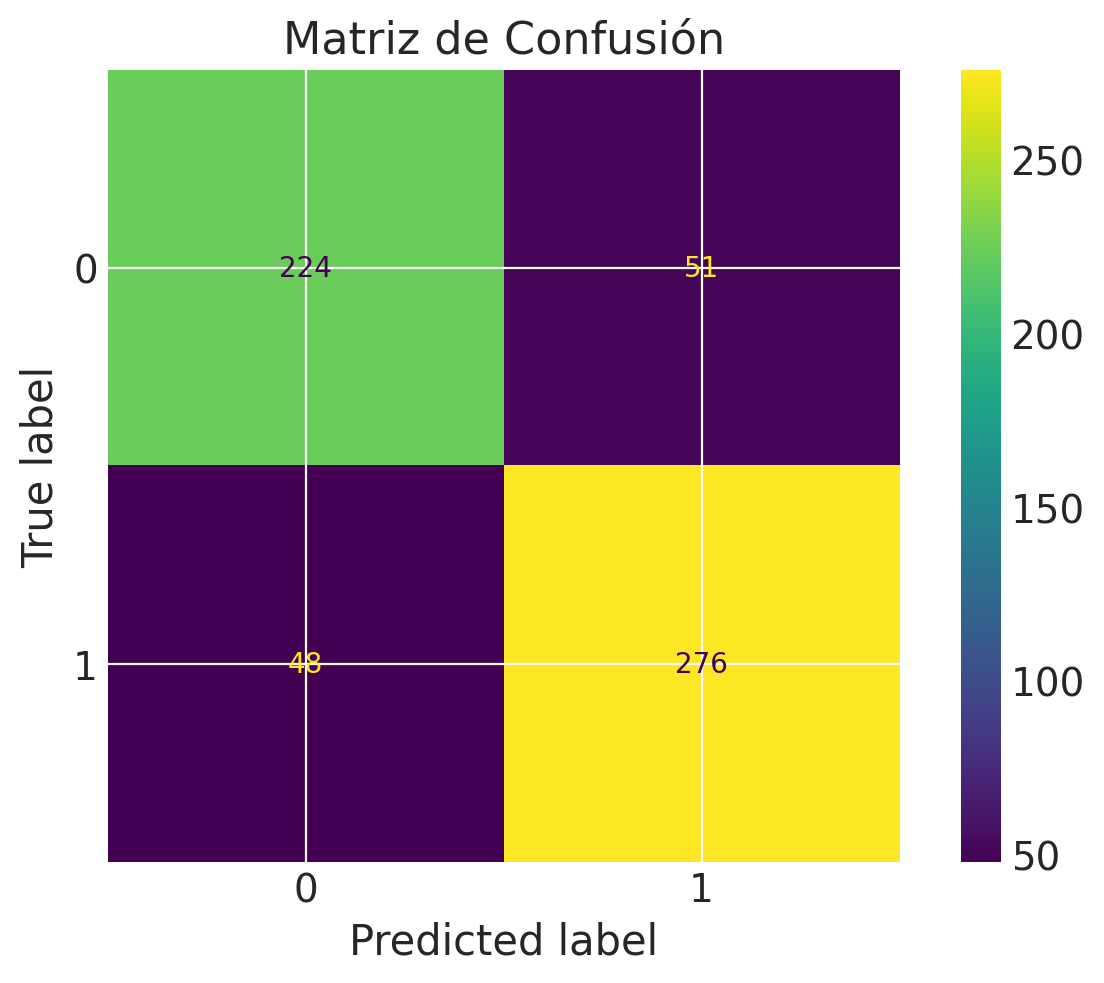

In [116]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from models_gen_X_y import plot_confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)

model = CatBoostClassifier()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
predictions = model.predict(X_test)
print(predictions)
plot_confusion_matrix(model, X_test, y_test)

In [61]:
print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       275
           1       0.88      0.89      0.88       324

    accuracy                           0.87       599
   macro avg       0.87      0.87      0.87       599
weighted avg       0.87      0.87      0.87       599



In [91]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

CB = CatBoostClassifier()
random_search_cb = RandomizedSearchCV(estimator=CB, param_distributions=catboost_param_dist,
                                      cv = 5, verbose = 2, random_state=42)
random_search_cb.fit(X_train, y_train)
predictions = random_search_cb.predict(X_test)
print(classification_report(y_pred= predictions, y_true = y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6847235	total: 912us	remaining: 73ms
1:	learn: 0.6767013	total: 1.74ms	remaining: 68.8ms
2:	learn: 0.6692757	total: 2.6ms	remaining: 67.6ms
3:	learn: 0.6620662	total: 3.43ms	remaining: 66ms
4:	learn: 0.6563880	total: 4.28ms	remaining: 65ms
5:	learn: 0.6496214	total: 5.14ms	remaining: 64.2ms
6:	learn: 0.6439208	total: 6.02ms	remaining: 63.6ms
7:	learn: 0.6380381	total: 6.96ms	remaining: 63.5ms
8:	learn: 0.6332629	total: 7.84ms	remaining: 62.7ms
9:	learn: 0.6287020	total: 8.64ms	remaining: 61.3ms
10:	learn: 0.6240021	total: 9.46ms	remaining: 60.2ms
11:	learn: 0.6196354	total: 10.3ms	remaining: 59.1ms
12:	learn: 0.6159669	total: 11.2ms	remaining: 58.5ms
13:	learn: 0.6123486	total: 12ms	remaining: 57.5ms
14:	learn: 0.6085508	total: 12.8ms	remaining: 56.4ms
15:	learn: 0.6046861	total: 13.8ms	remaining: 55.9ms
16:	learn: 0.6014761	total: 14.7ms	remaining: 55.5ms
17:	learn: 0.5983909	total: 15.6ms	remaining: 54.4ms
18:	l

AttributeError: 'RandomizedSearchCV' object has no attribute 'get_evals_result'

In [ ]:
params = random_search_cb.get_params

0:	learn: 0.6396401	total: 2.36ms	remaining: 2.32s
1:	learn: 0.5890008	total: 4.4ms	remaining: 2.16s
2:	learn: 0.5635555	total: 6.51ms	remaining: 2.13s
3:	learn: 0.5310492	total: 8.55ms	remaining: 2.1s
4:	learn: 0.5051733	total: 10.6ms	remaining: 2.08s
5:	learn: 0.4835712	total: 12.6ms	remaining: 2.05s
6:	learn: 0.4619470	total: 14.9ms	remaining: 2.08s
7:	learn: 0.4527075	total: 16.9ms	remaining: 2.06s
8:	learn: 0.4391859	total: 19ms	remaining: 2.06s
9:	learn: 0.4203498	total: 20.9ms	remaining: 2.04s
10:	learn: 0.4071507	total: 22.8ms	remaining: 2.02s
11:	learn: 0.3905512	total: 24.8ms	remaining: 2.01s
12:	learn: 0.3783772	total: 26.8ms	remaining: 2s
13:	learn: 0.3642208	total: 28.9ms	remaining: 2.01s
14:	learn: 0.3600608	total: 31ms	remaining: 2s
15:	learn: 0.3521662	total: 32.8ms	remaining: 1.99s
16:	learn: 0.3386328	total: 34.6ms	remaining: 1.97s
17:	learn: 0.3336406	total: 36.6ms	remaining: 1.97s
18:	learn: 0.3270450	total: 38.5ms	remaining: 1.96s
19:	learn: 0.3195109	total: 40.3ms

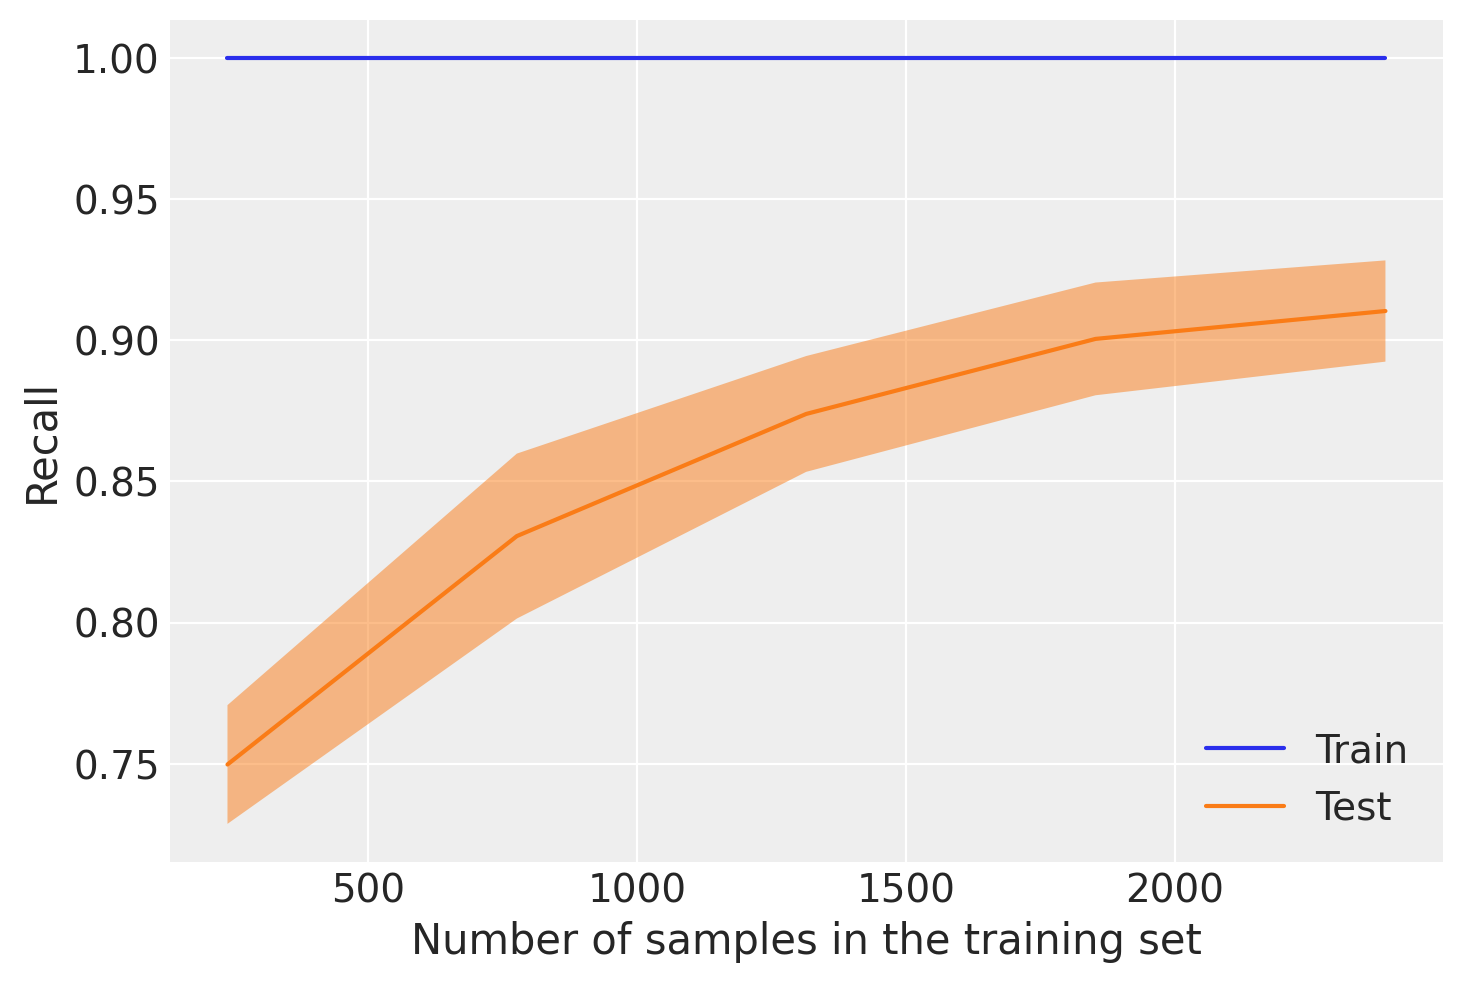

In [127]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.utils import shuffle

X, y = shuffle(data, data_y, random_state=42)
LearningCurveDisplay.from_estimator(CatBoostClassifier(**params), X, y  , scoring='recall',cv=5)

In [63]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#scores = ['precision', 'recall']
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid_search = GridSearchCV(
    SVC(), param_grid, verbose=3
)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.577 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.555 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.608 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.619 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.607 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.609 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

0.7629382303839732


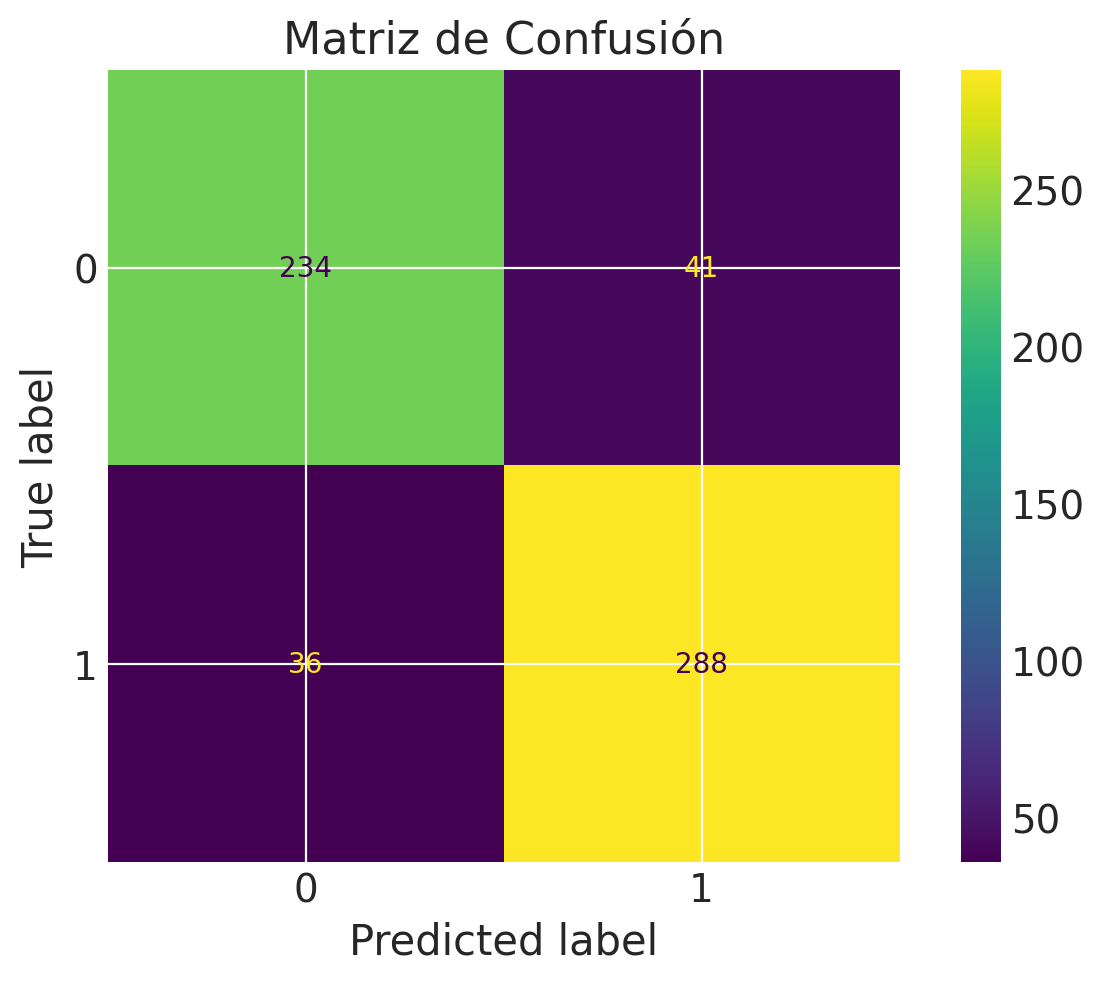

In [71]:
acc = grid_search.best_estimator_.score(X_test, y_test)
predictions = grid_search.best_estimator_.predict(X_test)
print(acc)
plot_confusion_matrix(model, X_test, y_test)

Learning rate set to 0.005591
0:	learn: 0.6909176	total: 1.85ms	remaining: 1.85s
1:	learn: 0.6888504	total: 3.46ms	remaining: 1.72s
2:	learn: 0.6872598	total: 4.98ms	remaining: 1.65s
3:	learn: 0.6853405	total: 6.61ms	remaining: 1.65s
4:	learn: 0.6837513	total: 7.99ms	remaining: 1.59s
5:	learn: 0.6818839	total: 9.45ms	remaining: 1.56s
6:	learn: 0.6802610	total: 11ms	remaining: 1.56s
7:	learn: 0.6779357	total: 12.4ms	remaining: 1.54s
8:	learn: 0.6761717	total: 14ms	remaining: 1.54s
9:	learn: 0.6743519	total: 15.5ms	remaining: 1.53s
10:	learn: 0.6729860	total: 16.9ms	remaining: 1.52s
11:	learn: 0.6708812	total: 18.4ms	remaining: 1.52s
12:	learn: 0.6691853	total: 20.1ms	remaining: 1.52s
13:	learn: 0.6677131	total: 21.6ms	remaining: 1.52s
14:	learn: 0.6661626	total: 23.2ms	remaining: 1.53s
15:	learn: 0.6642596	total: 24.9ms	remaining: 1.53s
16:	learn: 0.6623217	total: 26.3ms	remaining: 1.52s
17:	learn: 0.6606754	total: 27.8ms	remaining: 1.51s
18:	learn: 0.6589057	total: 29.4ms	remaining: 1.

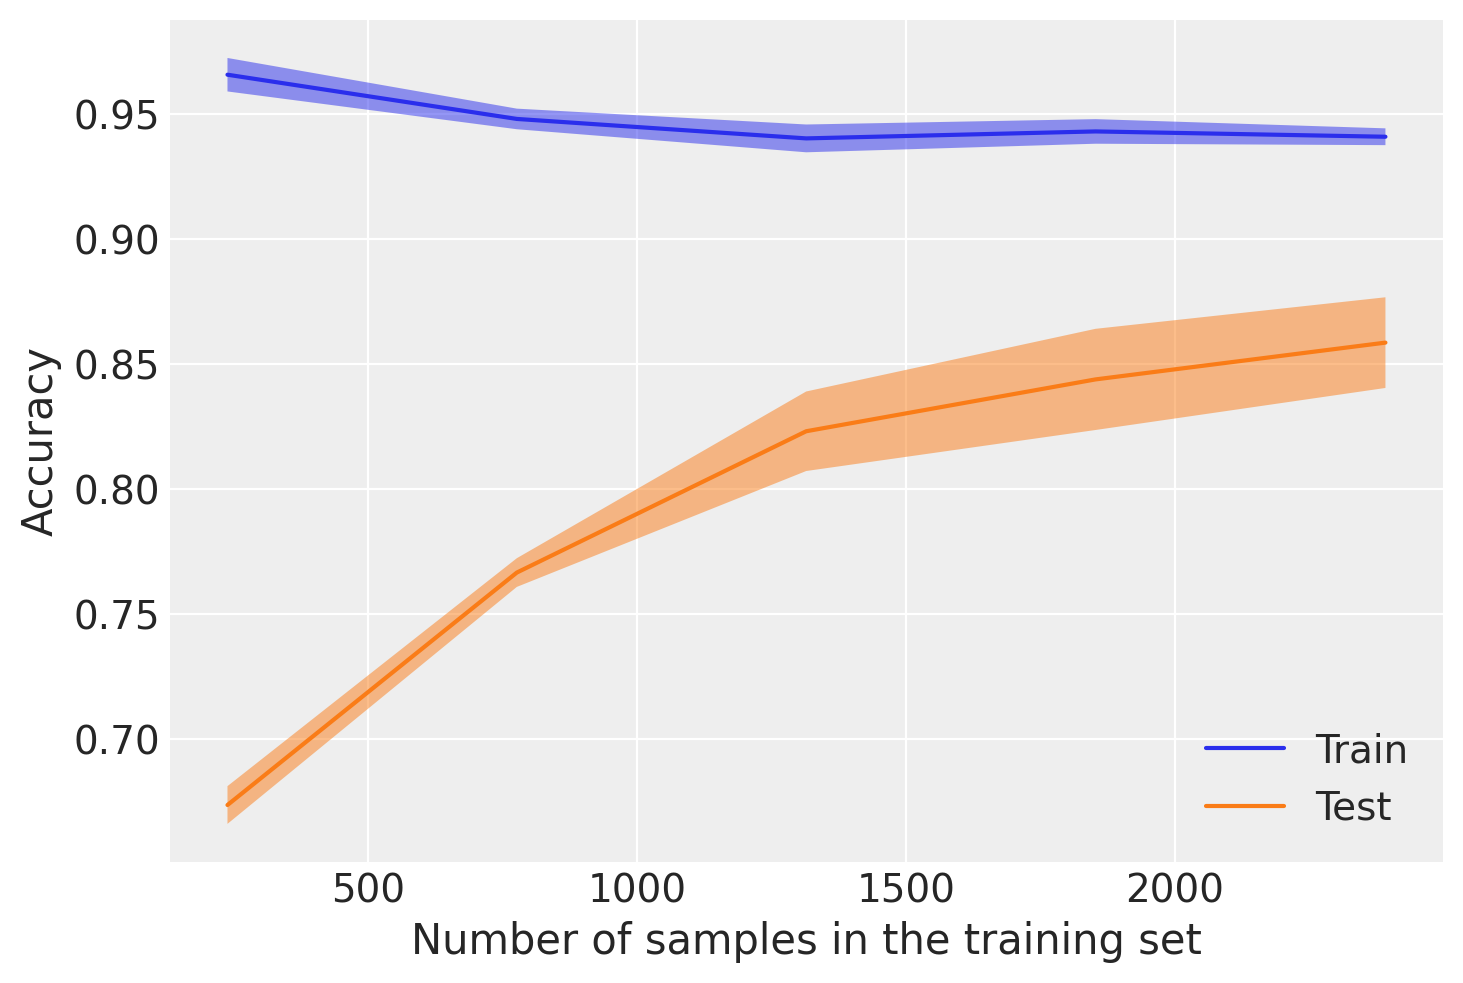

In [72]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = shuffle(data, data_y, random_state=42)
LearningCurveDisplay.from_estimator(CatBoostClassifier(), X,y,scoring='accuracy', cv=5)

In [ ]:
# Guardar plk 85%+ modelos
# countplot
# gráficos de conf, roc curve, model selection
# proceso de plks en scripts


# MODELOS
# SVM
# xgboost randon search + bayes opt
# catboost
# mlp

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
%config InlineBackend.figure_format = 'retina'
floatX = pytensor.config.floatX
RANDOM_SEED = 9927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [ ]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = rng.standard_normal(size=(X_train.shape[1], n_hidden)).astype(floatX)
    init_2 = rng.standard_normal(size=(n_hidden, n_hidden)).astype(floatX)
    init_out = rng.standard_normal(size=n_hidden).astype(floatX)

    coords = {
        "hidden_layer_1": np.arange(n_hidden),
        "hidden_layer_2": np.arange(n_hidden),
        "train_cols": np.arange(X_train.shape[1]),
        "obs_id": np.arange(X_train.shape[0]),
    }
    with pm.Model(coords=coords) as neural_network:
        ann_input = pm.Data("ann_input", X_train, dims=("obs_id", "train_cols"))
        ann_output = pm.Data("ann_output", y_train, dims="obs_id")

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal(
            "w_in_1", 0, sigma=1, initval=init_1, dims=("train_cols", "hidden_layer_1")
        )

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal(
            "w_1_2", 0, sigma=1, initval=init_2, dims=("hidden_layer_1", "hidden_layer_2")
        )

        # Weights from hidden layer to output
        weights_2_out = pm.Normal("w_2_out", 0, sigma=1, initval=init_out, dims="hidden_layer_2")

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli(
            "out",
            act_out,
            observed=ann_output,
            total_size=y_train.shape[0],  # IMPORTANT for minibatches
            dims="obs_id",
        )
    return neural_network

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)
neural_network = construct_nn(X_train, y_train)

c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


In [ ]:
%%time
with neural_network:
    approx = pm.fit(n=30_000)

Interrupted at 1,892 [6%]: Average Loss = 2,615.1


CPU times: total: 5min 43s
Wall time: 5min 47s


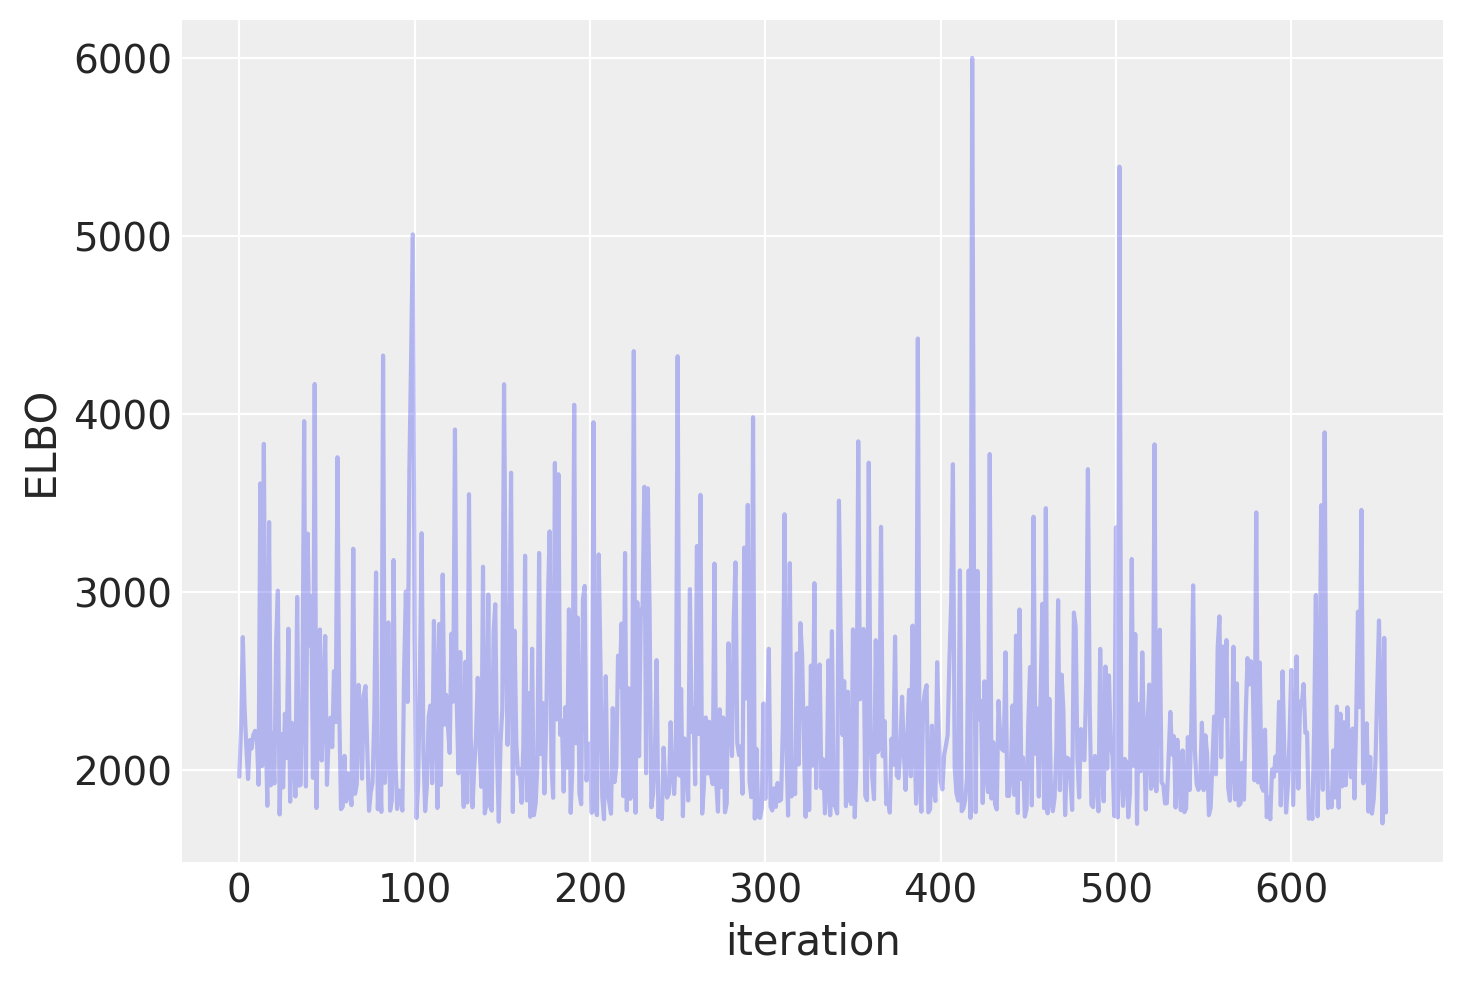

In [ ]:
plt.plot(approx.hist, alpha=0.3)
plt.ylabel("ELBO")
plt.xlabel("iteration");

In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def kmeans_clustering(data: pd.DataFrame, k: int, max_iterations: int = 100) -> Tuple[pd.DataFrame, np.ndarray]:
    """
    Implementa el algoritmo de clustering K-means para DataFrames.
    
    :param data: DataFrame con las características
    :param k: Número de clusters
    :param max_iterations: Número máximo de iteraciones
    :return: Tupla con DataFrame de centroides y array de etiquetas de cluster para cada punto
    """
    # Convertir DataFrame a array numpy para cálculos más rápidos
    data_array = data.values
    
    # Inicializar centroides aleatoriamente
    centroid_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data_array[centroid_indices]
    
    for _ in range(max_iterations):
        # Asignar puntos a los centroides más cercanos
        distances = np.sqrt(((data_array[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        
        # Actualizar centroides
        new_centroids = np.array([data_array[labels == i].mean(axis=0) for i in range(k)])
        
        # Verificar convergencia
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Convertir centroides de vuelta a DataFrame
    centroid_df = pd.DataFrame(centroids, columns=data.columns)
    
    return centroid_df, labels

def visualize_high_dim_clusters(data: pd.DataFrame, labels: np.ndarray, centroids: pd.DataFrame, 
                                landslide_labels: np.ndarray, method: str = 'pca'):
    """
    Visualiza los resultados del clustering K-means para datos de alta dimensionalidad,
    diferenciando entre muestras de deslizamiento y no deslizamiento.
    
    :param data: DataFrame con las características
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param centroids: DataFrame de centroides
    :param landslide_labels: Array numpy de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :param method: Método de reducción de dimensionalidad ('pca' o 'tsne')
    """
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("El método debe ser 'pca' o 'tsne'")

    # Reducir dimensionalidad de los datos y centroides
    data_2d = reducer.fit_transform(data)
    centroids_2d = reducer.transform(centroids)

    # Visualizar los resultados
    plt.figure(figsize=(12, 8))
    
    # Diferenciar entre deslizamiento y no deslizamiento
    scatter_landslide = plt.scatter(data_2d[landslide_labels == 1, 0], data_2d[landslide_labels == 1, 1],
                                    c=labels[landslide_labels == 1], cmap='viridis', marker='o', label='Deslizamiento')
    scatter_non_landslide = plt.scatter(data_2d[landslide_labels == 0, 0], data_2d[landslide_labels == 0, 1],
                                        c=labels[landslide_labels == 0], cmap='viridis', marker='s', label='No Deslizamiento')
    
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroides')
    
    plt.colorbar(scatter_landslide)
    plt.title(f'Resultados del Clustering K-means ({method.upper()})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.show()

def visualize_feature_importance(data: pd.DataFrame, labels: np.ndarray, n_top_features: int = 10):
    """
    Visualiza la importancia de las características basada en la varianza entre clusters.
    
    :param data: DataFrame con las características
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param n_top_features: Número de características principales a visualizar
    """
    k = len(np.unique(labels))
    feature_importance = np.zeros(data.shape[1])

    for i in range(k):
        cluster_data = data[labels == i]
        cluster_mean = cluster_data.mean()
        feature_importance += ((cluster_data - cluster_mean) ** 2).sum()

    # Normalizar la importancia de las características
    feature_importance /= feature_importance.sum()

    # Ordenar las características por importancia
    sorted_features = feature_importance.sort_values(ascending=False)
    top_features = sorted_features.head(n_top_features)

    # Visualizar la importancia de las características
    plt.figure(figsize=(12, 6))
    top_features.plot(kind='bar')
    plt.xlabel('Nombre de la característica')
    plt.ylabel('Importancia relativa')
    plt.title('Importancia de las características en el clustering')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
data = X
data_y = y

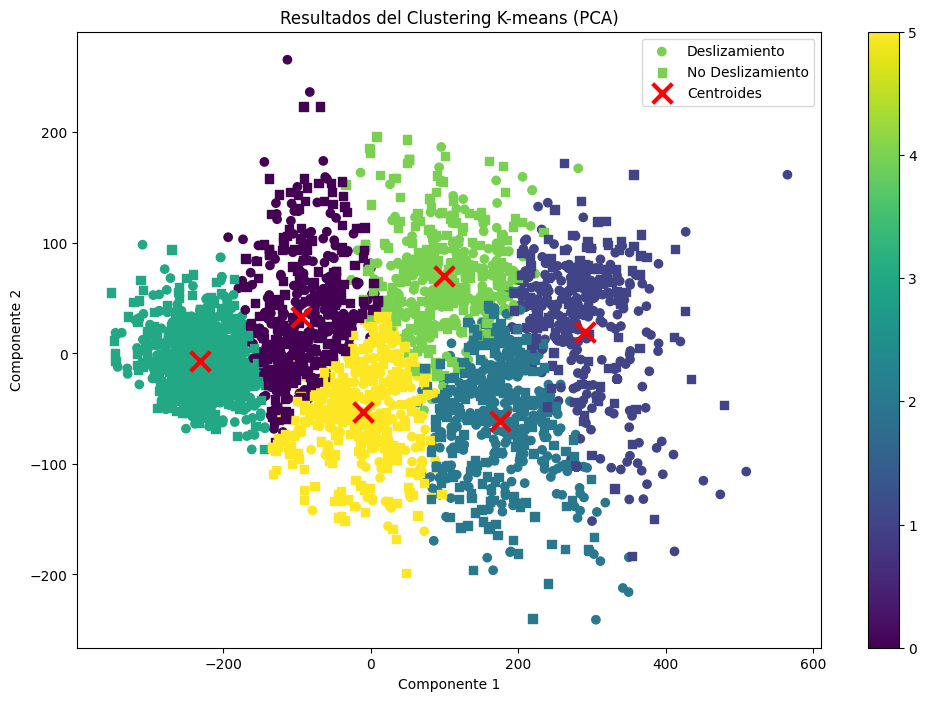

In [ ]:
centroids, label = kmeans_clustering(data, 6)
visualize_high_dim_clusters(data, label, centroids, method='pca', landslide_labels=data_y)

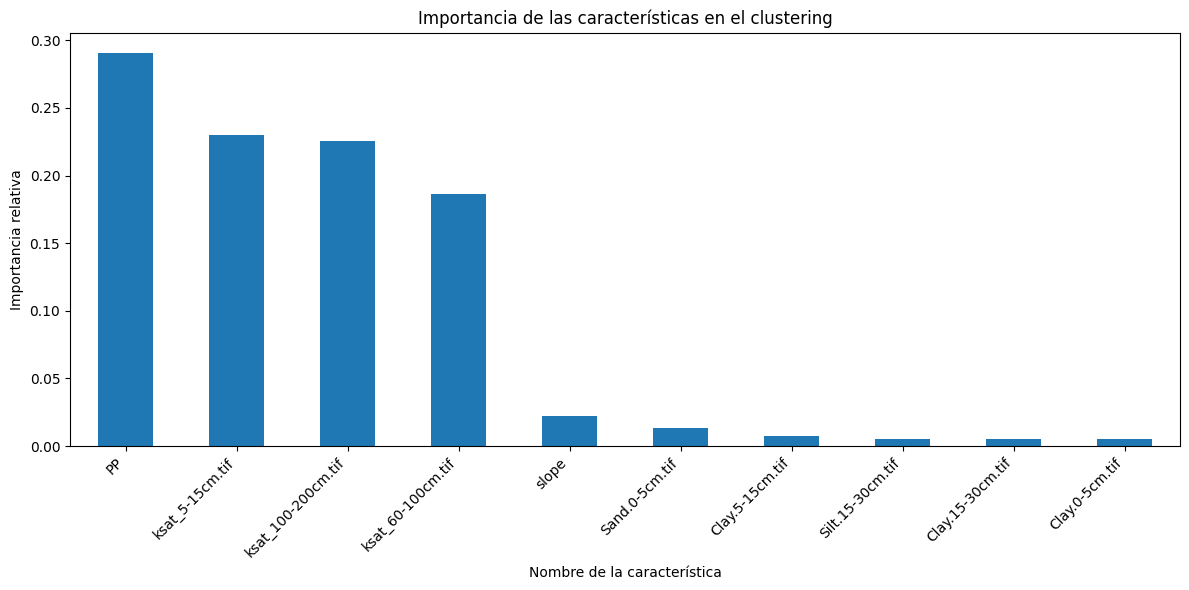

In [ ]:
visualize_feature_importance(data, label)

In [ ]:
def landslide_distribution_table(labels: np.ndarray, landslide_labels: np.ndarray) -> pd.DataFrame:
    """
    Crea una tabla que muestra la distribución de muestras de deslizamiento (1) y no deslizamiento (0) en cada cluster.
    
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param landslide_labels: Array numpy de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :return: DataFrame con la distribución de deslizamientos por cluster
    """
    clusters = np.unique(labels)
    distribution = []

    for cluster in clusters:
        cluster_mask = labels == cluster
        cluster_landslides = landslide_labels[cluster_mask]
        
        non_landslides = np.sum(cluster_landslides == 0)
        landslides = np.sum(cluster_landslides == 1)
        total = non_landslides + landslides
        
        distribution.append({
            'Cluster': cluster,
            'No Deslizamiento (0)': non_landslides,
            'Deslizamiento (1)': landslides,
            'Total': total,
            '% No Deslizamiento': non_landslides / total * 100,
            '% Deslizamiento': landslides / total * 100
        })

    df_distribution = pd.DataFrame(distribution)
    df_distribution.set_index('Cluster', inplace=True)
    
    # Añadir fila de totales
    totals = df_distribution.sum()
    totals['% No Deslizamiento'] = totals['No Deslizamiento (0)'] / totals['Total'] * 100
    totals['% Deslizamiento'] = totals['Deslizamiento (1)'] / totals['Total'] * 100
    df_distribution.loc['Total'] = totals

    return df_distribution

In [ ]:
landslide_distribution_table(label, data_y)

No Deslizamiento (0)  Deslizamiento (1)   Total  % No Deslizamiento  \
Cluster                                                                        
0                       249.0              252.0   501.0           49.700599   
1                       117.0              303.0   420.0           27.857143   
2                       213.0              267.0   480.0           44.375000   
3                       418.0              450.0   868.0           48.156682   
4                       258.0              205.0   463.0           55.723542   
5                       275.0              141.0   416.0           66.105769   
Total                  1530.0             1618.0  3148.0           48.602287   

         % Deslizamiento  
Cluster                   
0              50.299401  
1              72.142857  
2              55.625000  
3              51.843318  
4              44.276458  
5              33.894231  
Total          51.397713

In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple
from sklearn.utils import resample

def select_non_landslide_samples(data: pd.DataFrame, labels: np.ndarray, landslide_labels: np.ndarray, 
                                 diversity_factor: float = 0.2) -> Tuple[pd.DataFrame, np.ndarray]:
    """
    Selecciona muestras de no deslizamiento basadas en los resultados del clustering.
    
    :param data: DataFrame con todas las muestras y sus características
    :param labels: Array de etiquetas de cluster para cada muestra
    :param landslide_labels: Array de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :param diversity_factor: Proporción de muestras a seleccionar de otros clusters (default 0.2)
    :return: Tuple con DataFrame de muestras no deslizamiento seleccionadas y sus etiquetas
    """
    # Crear tabla de distribución
    clusters = np.unique(labels)
    distribution = []
    for cluster in clusters:
        cluster_mask = labels == cluster
        cluster_landslides = landslide_labels[cluster_mask]
        non_landslides = np.sum(cluster_landslides == 0)
        landslides = np.sum(cluster_landslides == 1)
        total = non_landslides + landslides
        distribution.append({
            'Cluster': cluster,
            'No Deslizamiento (0)': non_landslides,
            'Deslizamiento (1)': landslides,
            'Total': total,
            '% No Deslizamiento': non_landslides / total * 100,
            '% Deslizamiento': landslides / total * 100
        })
    df_distribution = pd.DataFrame(distribution)
    
    # Identificar el cluster con menor porcentaje de deslizamientos
    target_cluster = df_distribution.loc[df_distribution['% Deslizamiento'].idxmin(), 'Cluster']
    
    # Seleccionar muestras no deslizamiento del cluster objetivo
    target_mask = (labels == target_cluster) & (landslide_labels == 0)
    target_samples = data[target_mask]
    
    # Calcular el número de muestras adicionales a seleccionar de otros clusters
    n_additional = int(len(target_samples) * diversity_factor)
    
    # Seleccionar muestras adicionales de otros clusters
    other_clusters_mask = (labels != target_cluster) & (landslide_labels == 0)
    other_samples = data[other_clusters_mask]
    additional_samples = resample(other_samples, n_samples=n_additional, replace=False)
    
    # Combinar muestras
    selected_samples = pd.concat([target_samples, additional_samples])
    selected_labels = np.zeros(len(selected_samples))  # Todas son no deslizamiento (0)
    
    print(f"Seleccionadas {len(target_samples)} muestras del cluster {target_cluster}")
    print(f"Añadidas {n_additional} muestras de otros clusters para diversidad")
    print(f"Total de muestras no deslizamiento seleccionadas: {len(selected_samples)}")
    
    return selected_samples, selected_labels


In [ ]:
non_landslide_samples, non_landslide_labels = select_non_landslide_samples(data, label, data_y, diversity_factor=0.8)

Seleccionadas 275 muestras del cluster 5
Añadidas 220 muestras de otros clusters para diversidad
Total de muestras no deslizamiento seleccionadas: 495


In [ ]:
non_landslide_samples.columns

Index(['slope', 'valor_humedad_suelo1', 'PP', 'ksat_60-100cm.tif',
       'PIRange_Clay.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif',
       'PIRange_Clay.30-60cm.tif', 'PIRange_Clay.0-5cm.tif',
       'PIRange_Clay.100-200cm.tif', 'PIRange_Clay.60-100cm.tif',
       'Bulkd.60-100cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'Clay.5-15cm.tif',
       'Clay.15-30cm.tif', 'PIRange_Bulkd.100-200cm.tif',
       'PIRange_Sand.15-30cm.tif', 'Clay.0-5cm.tif', 'Silt.15-30cm.tif',
       'n_30-60cm.tif', 'PIRange_Sand.30-60cm.tif', 'n_5-15cm.tif',
       'PIRange_Sand.60-100cm.tif', 'Bulkd.15-30cm.tif',
       'PIRange_Sand.0-5cm.tif', 'ksat_100-200cm.tif', 'AvMoist.60-100cm.tif',
       'ksat_5-15cm.tif', 'Sand.0-5cm.tif', 'n_60-100cm.tif',
       'ksat.15-30cm.tif'],
      dtype='object')

In [ ]:
non_landslide_samples['Valor'] = 0

In [ ]:
non_landslide_labels = pd.DataFrame()
non_landslide_labels = non_landslide_samples['Valor']
non_landslide_samples = non_landslide_samples.drop(columns=['Valor'])

In [ ]:
data = pd.concat([data, non_landslide_samples])
data_y = pd.concat([data_y, non_landslide_labels])